# Project -  HR Attrition Prediction 
* **Objective**

In this project, we are going to do a exploratory data analysis to see what are the features related to the employees' attrition. And build a classification machine learning model to try to predict if a employee would leave or not given a certain set of features.


* __Description__

The data include, satisfaction_level, last_evaluation, number_project, average_monthly_hours, time_spend_company, Work_accident, left, promotion_last_5years, department, salary. Target variable is left, which is a binary label between 0 and 1.

## 1. Load the libraries and dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [4]:
pro_7 = pd.read_csv('/Users/qi/Desktop/DS /camp/Project 7/HR.csv')

## 2. EDA

In [56]:
pro_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [57]:
pro_7.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [58]:
pro_7.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### 2.1 Target Distribution

In [59]:
pro_7['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [60]:
left = pro_7[(pro_7['left'] == 1)]
no_left = pro_7[(pro_7['left'] == 0)]


trace = go.Pie(labels = ['Still_Employed', 'Left'], values = pro_7['left'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of left variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

### 2.3 Independent Variables Correlation Analysis

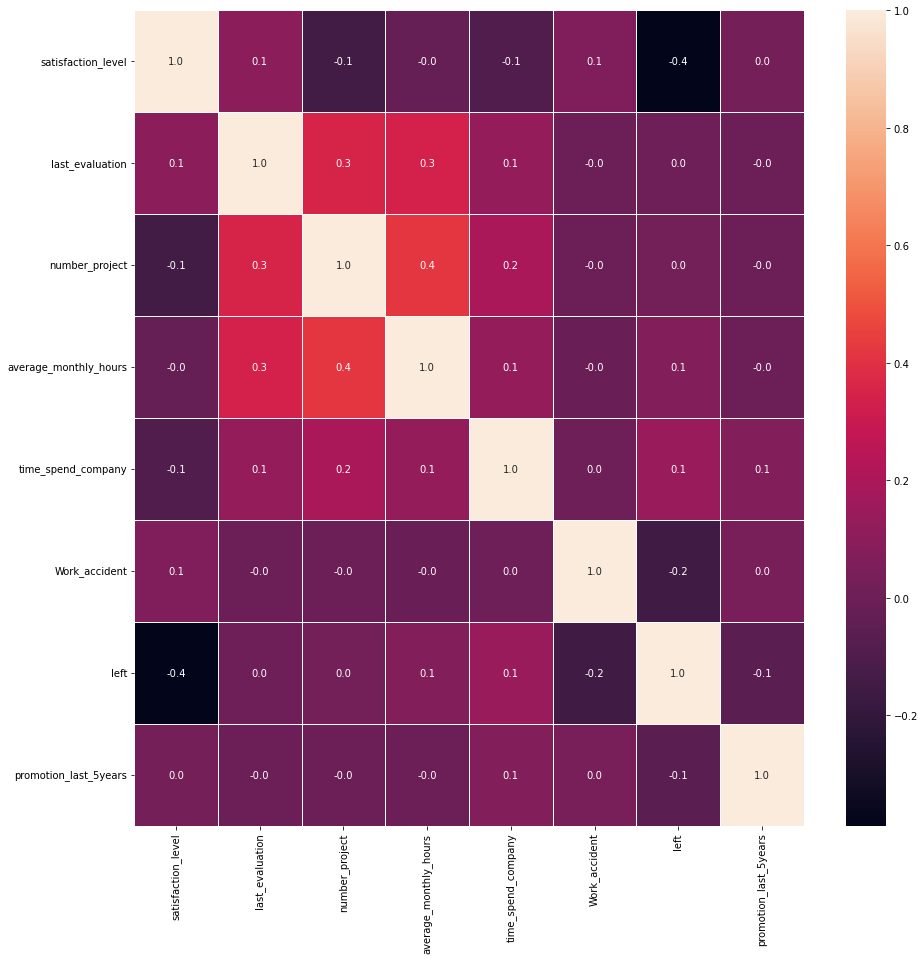

In [61]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pro_7.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [68]:
# create bins for hours, 注意把每个bin转换成catagory
bins=[0,100,120,140,160,180,200,220,240,260,280,300,320]
pro_7['hoursbin'] = pd.cut(pro_7['average_monthly_hours'],bins).cat.codes
pro_7['hoursbin'].value_counts()

3     2484
8     2064
7     1759
4     1644
9     1582
5     1540
6     1508
2     1457
10     403
1      326
11     159
0       73
Name: hoursbin, dtype: int64

In [63]:
pro_7['hoursbin'] = pro_7['hoursbin'].astype('str')
pro_7.head()
#type(pro_7['hoursbin'][1])

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,hoursbin
0,0.38,0.53,2,157,3,0,1,0,sales,low,3
1,0.80,0.86,5,262,6,0,1,0,sales,medium,9
2,0.11,0.88,7,272,4,0,1,0,sales,medium,9
3,0.72,0.87,5,223,5,0,1,0,sales,low,7
4,0.37,0.52,2,159,3,0,1,0,sales,low,3


In [64]:
pro_7['hoursbin'].value_counts().sort_values()

0       73
11     159
1      326
10     403
2     1457
6     1508
5     1540
9     1582
4     1644
7     1759
8     2064
3     2484
Name: hoursbin, dtype: int64

### 2.4 Features Distribution and Barplot

In [65]:
def barplot(var_select) :
    
    tmp1 = pd.DataFrame(pd.crosstab(pro_7[var_select],pro_7['left']), )
    tmp1['left%'] = tmp1[1] / (tmp1[1] + tmp1[0]) * 100

    color=['lightskyblue','gold']
    
    trace1 = go.Bar(
        x=tmp1.index,
        y=tmp1[1],
        name='Left',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp1.index,
        y=tmp1[0],
        name='Still_Employed', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp1.index,
        y=tmp1['left%'],
        yaxis = 'y2',
        name='% Left', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 105], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Left'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [66]:
barplot('satisfaction_level')
barplot('last_evaluation')
barplot('number_project')
barplot('hoursbin')
barplot('time_spend_company')
barplot('Work_accident')
barplot('promotion_last_5years')
barplot('department')
barplot('salary')

## 3. Building Model

In [69]:
cat_data=pro_7.select_dtypes(include='object')
a = list(cat_data)
for i in range(len(a)):
        pro_7 = pd.get_dummies(pro_7, columns = [a[i]])

In [5]:
pro_7.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [71]:
#split train and test set
from sklearn.model_selection import train_test_split
Y = pro_7['left']
X = pro_7.drop(['left'], axis =1,inplace = False)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

#Resampling to handle imbalanced labels
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(X, Y)

model = LogisticRegression(C = 100, class_weight = 'balanced', max_iter = 1000)
model.fit(x_train_sm,y_train_sm)

Y_score = model.predict_proba(x_test)[:,1]
y_pred = model.predict(x_test)

print('Logistic Regression')
print('acc:', accuracy_score(y_test, y_pred))
print('rec:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression
acc: 0.8163333333333334
rec: 0.7875354107648725
F1: 0.6686710763680096
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      2294
           1       0.58      0.79      0.67       706

    accuracy                           0.82      3000
   macro avg       0.75      0.81      0.77      3000
weighted avg       0.85      0.82      0.82      3000



In [73]:
#KNN
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report

#X_train = train.drop('left',axis=1, inplace=False)
#y_train = train['left']
#X_test = test.drop('left',axis=1, inplace=False)
#y_test = test['left']

# Resampling to handle imbalanced labels
#sm = SMOTE(random_state=1234)
#x_train_sm, y_train_sm = sm.fit_resample(X, Y)


model = kNN(n_neighbors = 3, algorithm='auto', weights='distance')
model.fit(x_train_sm,y_train_sm)

y_pred = model.predict(x_test)

print('KNN')
print('acc:', accuracy_score(y_test, y_pred))
print('rec:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN
acc: 1.0
rec: 1.0
F1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2294
           1       1.00      1.00      1.00       706

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [74]:
#ROC Curve function definition 
from sklearn.metrics import roc_auc_score, roc_curve
def roccurve():
    model_roc_auc = round(roc_auc_score(y_test, Y_score),3)
    fpr, tpr, t = roc_curve(y_test, Y_score)
    trace4 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : ",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace5 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))

    layout = go.Layout(title = str("ROC Curve"+" "+'('+str(model_roc_auc)+')'),
                   xaxis = dict(title = 'false positive rate'),
                   yaxis = dict(title = 'true positive rate'))
    fig = go.Figure(data=[trace4, trace5], layout= layout)
    py.iplot(fig)

In [75]:
roccurve()

In [79]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train_sm,y_train_sm)

Y_score = model.predict_proba(x_test)[:,1]
y_pred = model.predict(x_test)

print('Decision Tree')
print('acc:', accuracy_score(y_test, y_pred))
print('rec:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

roccurve()

Decision Tree
acc: 1.0
rec: 1.0
F1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2294
           1       1.00      1.00      1.00       706

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [80]:
#SVM
from sklearn.svm import SVC

model = SVC(C = 10, probability = True)
model.fit(x_train_sm,y_train_sm)

Y_score = model.predict_proba(x_test)[:,1]
y_pred = model.predict(x_test)

print('SVM')
print('acc:', accuracy_score(y_test, y_pred))
print('rec:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

roccurve()

SVM
acc: 0.834
rec: 0.8810198300283286
F1: 0.7141216991963261
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      2294
           1       0.60      0.88      0.71       706

    accuracy                           0.83      3000
   macro avg       0.78      0.85      0.80      3000
weighted avg       0.87      0.83      0.84      3000



In [82]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_sm,y_train_sm)

Y_score = model.predict_proba(x_test)[:,1]
y_pred = model.predict(x_test)

print('Random Forest')
print('acc:', accuracy_score(y_test, y_pred))
print('rec:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

roccurve()

Random Forest
acc: 1.0
rec: 1.0
F1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2294
           1       1.00      1.00      1.00       706

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



## Conclusion

After comparing each of the models, we found that the random forest could give us the best results.